In [1]:
import sys, os, boto3
import rasterio

import geopandas as gpd
import pandas as pd

from tqdm.notebook import tqdm
from shapely.geometry import box

sys.path.insert(0,"/home/wb411133/Code/gostrocks/src")

import GOSTRocks.rasterMisc as rMisc
import GOSTRocks.dataMisc as dataMisc
import GOSTRocks.mapMisc as mapMisc

/home/wb411133/.conda/envs/ee/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [4]:
in_file_list = '/home/wb411133/temp/fathom_files.csv'

s3_bucket = 'wbg-geography01'
s3_prefix = 'FATHOM/v2023/'

in_files = pd.read_csv(in_file_list)
s3 = boto3.resource('s3')
my_bucket = s3.Bucket(s3_bucket)

In [42]:
tile = 's57w028.tif'
return_period = '1000'
defended = 'DEFENDED'

coastal_folder = f'GLOBAL-1ARCSEC-NW_OFFSET-1in{return_period}-COASTAL-{defended}-DEPTH-2020-PERCENTILE50-v3.0'
fluvial_folder = f'GLOBAL-1ARCSEC-NW_OFFSET-1in{return_period}-FLUVIAL-{defended}-DEPTH-2020-PERCENTILE50-v3.0'
pluvial_folder = f'GLOBAL-1ARCSEC-NW_OFFSET-1in{return_period}-PLUVIAL-{defended}-DEPTH-2020-PERCENTILE50-v3.0'

coastal_file = os.path.join('s3://', s3_bucket, s3_prefix, coastal_folder, tile)
fluvial_file = os.path.join('s3://', s3_bucket, s3_prefix, fluvial_folder, tile)
pluvial_file = os.path.join('s3://', s3_bucket, s3_prefix, pluvial_folder, tile)


In [43]:
fluvialR = rasterio.open(fluvial_file)
mapMisc.static_map_raster(fluvialR, colormap='Blues', thresh=[0,0.01,0.1,0.2,0.5,1,5])

RasterioIOError: '/vsis3/wbg-geography01/FATHOM/v2023/GLOBAL-1ARCSEC-NW_OFFSET-1in1000-FLUVIAL-DEFENDED-DEPTH-2020-PERCENTILE50-v3.0/s57w028.tif' does not exist in the file system, and is not recognized as a supported dataset name.

In [44]:
pluvialR = rasterio.open(pluvial_file)
mapMisc.static_map_raster(pluvialR, colormap='Blues', thresh=[0,0.01,0.1,0.2,0.5,1,5])

RasterioIOError: '/vsis3/wbg-geography01/FATHOM/v2023/GLOBAL-1ARCSEC-NW_OFFSET-1in1000-PLUVIAL-DEFENDED-DEPTH-2020-PERCENTILE50-v3.0/s57w028.tif' does not exist in the file system, and is not recognized as a supported dataset name.

<module 'matplotlib.pyplot' from '/home/wb411133/.conda/envs/ee/lib/python3.9/site-packages/matplotlib/pyplot.py'>

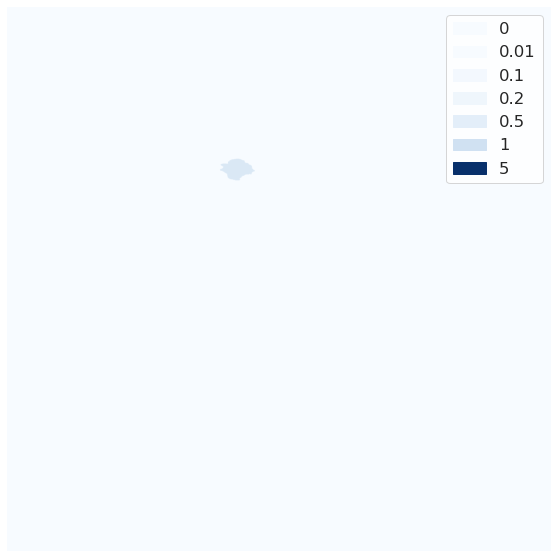

In [45]:
coastalR = rasterio.open(coastal_file)
mapMisc.static_map_raster(coastalR, colormap='Blues', thresh=[0,0.01,0.1,0.2,0.5,1,5])